### Conversion of VOC xml annotation style to YOLOv2.0 list
Functions and class definitions.

In [8]:
import sys
%load_ext autoreload
%autoreload 2
sys.path.append('../src')
import os
import convert_voc_to_other as cvto
import numpy as np

#Local absolute path to the folder containing the files.
local_path = "/Users/dominicwaithe/Documents/collaborators/WaitheD/micro_vision/cell_datasets/"
#For the files that require server location
path_on_server = '../../cell_datasets/'
#The save location of the models.
models_path_on_server = "../../models/"
#Read the dataset specification file:
path_to_spec = "/Users/dominicwaithe/Documents/collaborators/WaitheD/micro_vision/amca/config/dataset_spec.txt"
indices, datasets, datasets_size, datasets_class = cvto.return_dataset_spec(path_to_spec)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
index: 0 dataset neuroblastoma_phal_class/2018/
index: 1 dataset neuroblastoma_phal_class/2018/
index: 2 dataset neuroblastoma_phal_class/2018/
index: 3 dataset neuroblastoma_phal_class/2018/
index: 4 dataset neuroblastoma_phal_class/2018/
index: 5 dataset neuroblastoma_phal_class/2018/
index: 6 dataset neuroblastoma_phal_class/2018/
index: 7 dataset neuroblastoma_phal_dapi_class/2018/
index: 8 dataset erythroblast_dapi_class/2018/
index: 9 dataset erythroblast_dapi_glycophorinA_class/2018/
index: 10 dataset c127_dapi_class/2018/
index: 11 dataset eukaryote_dapi_class/2018/
index: 12 dataset fibroblast_nucleopore_class/2018/
index: 13 dataset hek_peroxisome_class/2018/
index: 14 dataset hek_peroxisome_all_class/2018/
index: 15 dataset erythroid_dapi_all_class/2019/
index: 16 dataset erythroid_dapi_class/2019/


In [68]:
#Generates ImageSet lists for the PASCAL dataset.
#This overwrites the existing, so be careful. 
#Seed mechanism seems to have changed since original.
#Only run for new datasets.
#for dataset,dataset_size in zip(datasets[15:16],datasets_size[15:16]):
#    cvto.generate_random_list(dataset_size, local_path+dataset)
   

### Converts the test and train files lists into YoloV2 and RetinaNet format.
 Updating the .name and .obj files For single and global classes.

In [8]:
#Generate the converted files.
cvto.create_YOLO_single(datasets,datasets_size,datasets_class,local_path,path_on_server,models_path_on_server)
cvto.create_retinaNet_single(datasets,datasets_size,local_path,models_path_on_server)

#Read the mixed file specification file:
path_to_mixed_file_spec = "/Users/dominicwaithe/Documents/collaborators/WaitheD/micro_vision/amca/config/mixed_dataset_spec.txt"
indices, params = cvto.return_mixed_dataset_spec(path_to_mixed_file_spec)
cvto.create_FasterRCNN_mixed_dataset(params, datasets,datasets_size,datasets_class,local_path,path_on_server,models_path_on_server)
cvto.create_YOLO_mixed_hetero_class(params, datasets,datasets_size,datasets_class,local_path,path_on_server,models_path_on_server)
cvto.create_retinaNet_global(params,datasets,datasets_size,local_path,models_path_on_server)

neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_dapi_class/2018/
erythroblast_dapi_class/2018/
erythroblast_dapi_glycophorinA_class/2018/
c127_dapi_class/2018/
eukaryote_dapi_class/2018/
fibroblast_nucleopore_class/2018/
hek_peroxisome_class/2018/
hek_peroxisome_all_class/2018/
erythroid_dapi_all_class/2019/
erythroid_dapi_class/2019/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_dapi_class/2018/
erythroblast_dapi_class/2018/
erythroblast_dapi_glycophorinA_class/2018/
c127_dapi_class/2018/
eukaryote_dapi_class/2018/
fibroblast_nucleopore_class/2018/
hek_peroxisome_class/2018/
hek_peroxisome_all_class/2018/
erythroi

# Diagnostic tools    

### This imports images and labels from YOLO and converts them into plot coordinates
Just to test that my label files created for YOLO match those from YOLO.

Populating the interactive namespace from numpy and matplotlib
532 532
0 0.552631578947 0.223684210526 0.135338345865 0.135338345865

0 0.742481203008 0.033834586466 0.142857142857 0.063909774436

0 0.627819548872 0.441729323308 0.131578947368 0.133458646617

0 0.306390977444 0.834586466165 0.193609022556 0.206766917293

0 0.466165413534 0.883458646617 0.12969924812 0.125939849624

0 0.885338345865 0.437969924812 0.12969924812 0.137218045113

0 0.932330827068 0.646616541353 0.122180451128 0.125939849624


293.999999999804 118.999999999832 72.00000000018 72.00000000018
395.000000000256 17.999999999912003 75.999999999924 33.999999999952
333.999999999904 234.99999999985602 69.999999999776 71.000000000244
163.00000000020802 443.99999999978 102.999999999792 109.99999999987601
248.000000000088 470.00000000024403 68.99999999984 66.99999999996801
471.00000000018 232.999999999984 68.99999999984 73.000000000116
496.000000000176 343.999999999796 65.000000000096 66.99999999996801


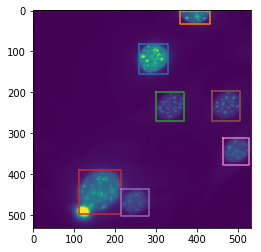

In [1]:
%pylab inline
import pylab as plt

path_in = '/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/fibroblast_nucleopore_class/2018/'
f = open(path_in+'labels/010055.txt',"r")
img = plt.imread(path_in+"JPEGImages/010055.jpg")

path_in = '/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/'
f = open(path_in+'labels/110082.txt',"r")
img = plt.imread(path_in+"JPEGImages/110082.jpg")

path_in = '/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/c127_dapi_class/2018/'
f = open(path_in+'labels/108633.txt',"r")
img = plt.imread(path_in+"JPEGImages/108633.jpg")
height, width = img.shape
print(height,width)

lines =[]
while 1:
    line = f.readline()
    print(line)
    if not line:
        break
    lines.append(line)
figure()
imshow(img) 
for line in lines:
    ele = line.split(" ")
    xmin = float(ele[1])*width
    ymin = float(ele[2])*height
    wid = float(ele[3])*width
    hei = float(ele[4].split("\r")[0])*height
    print(xmin,ymin,wid,hei)
    
    plta = [xmin-(wid//2),xmin-(wid//2),xmin+(wid//2),xmin+(wid//2),xmin-(wid//2)]
    pltb = [ymin-(hei//2),ymin+(hei//2),ymin+(hei//2),ymin-(hei//2),ymin-(hei//2)]
    
    plot(plta,pltb,'-')
    
 
f.close()


In [4]:
%pylab inline
import pylab as plt


def return_lines(path):
    f = open(path,"r")
    lines =[]
    while 1:
        line = f.readline()
        if not line:
            break
        lines.append(line)
    f.close()
    return lines
def plot_frames(img, lines,cp):
    height, width = img.shape
    print(height,width)
    for line in lines:
        ele = line.split(" ")
        if ele[0] == img_id:
            if float(ele[1]) > 0.25: #This is the YOLOv2 threshold for detection.
                xmin = float(ele[2])#float(ele[1])*width
                ymin =  float(ele[3]) #float(ele[2])*height
                xmax =  float(ele[4])#float(ele[3])*width
                ymax =  float(ele[5])#float(ele[4].split("\r")[0])*height

                plta = [xmin,xmin,xmax,xmax,xmin]
                pltb = [ymin,ymax,ymax,ymin,ymin]
                plot(plta,pltb,cp)
    return
def plot_gt(img, lines,cp):
    height, width = img.shape
   
    for line in lines:
        ele = line.split(" ")
        
        #if float(ele[1]) > 0.25: #This is the YOLOv2 threshold for detection.
        xmin =float(ele[1])*width
        ymin =float(ele[2])*height
        wid = float(ele[3])*width
        hei = float(ele[4].split("\r")[0])*height

        #print(xmin,ymin,wid,hei)

        plta = [xmin-(wid//2),xmin-(wid//2),xmin+(wid//2),xmin+(wid//2),xmin-(wid//2)]
        pltb = [ymin-(hei//2),ymin+(hei//2),ymin+(hei//2),ymin-(hei//2),ymin-(hei//2)]
        plot(plta,pltb,cp)
    return




dateset_path = '../../cell_datasets/erythroid_dapi_all_class/2019'

path_in = '/JPEGImages/'
img_id = '164514'
figure(figsize(14,14))
img = plt.imread(dateset_path+path_in+img_id+".jpg")
path_in = '/Users/dominicwaithe/Desktop/'

#ALL predictions
lines = return_lines(path_in+'comp4_det_test_dn_n50_cell - erythroid dapi all_10000.txt')
plot_frames(img, lines,'r-')



#ALL ground-truth
dateset_path = '../../cell_datasets/erythroid_dapi_all_class/2019'
path_in2 = dateset_path+'/labels/'
lines = return_lines(path_in2+img_id+'.txt')
plot_gt(img, lines,'w-')

imshow(img.astype(np.uint8),cmap='gray')

figure()
#non-blebbly predictions
lines = return_lines(path_in+'comp4_det_test_dn_n50_cell - erythroid dapi_10000.txt')
plot_frames(img, lines,'r--')


#non-blebbly ground-truth
dateset_path = '../../cell_datasets/erythroid_dapi_class/2019'
path_in2 = dateset_path+'/labels/'
lines = return_lines(path_in2+img_id+'.txt')
plot_gt(img, lines,'w--')
imshow(img.astype(np.uint8),cmap='gray')
 


plt.savefig('/Users/dominicwaithe/Desktop/'+img_id+'.eps', dpi=300, facecolor='w', edgecolor='w',  pad_inches=0.0, frameon=False, metadata=None)
        

Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: [Errno 2] No such file or directory: '/Users/dominicwaithe/Desktop/comp4_det_test_dn_n50_cell - erythroid dapi all_10000.txt'

<Figure size 1008x1008 with 0 Axes>

# How many cells there are in an image
Calculates how many cells there are in an image on average.

In [9]:
for dataset in datasets:
    print(dataset)
    cell_num = []
    for file_nm in os.listdir(local_path+dataset+'Labels/'):

        f = open(local_path+dataset+'Labels/'+file_nm)
        lines = f.readlines()
        #print('file_nm',file_nm,'num of lines',lines.__len__())
        cell_num.append(lines.__len__())
        f.close()
    print( np.average(cell_num))

neuroblastoma_phal_class/2018/
11.727777777777778
neuroblastoma_phal_class/2018/
11.727777777777778
neuroblastoma_phal_class/2018/
11.727777777777778
neuroblastoma_phal_class/2018/
11.727777777777778
neuroblastoma_phal_class/2018/
11.727777777777778
neuroblastoma_phal_class/2018/
11.727777777777778
neuroblastoma_phal_class/2018/
11.727777777777778
neuroblastoma_phal_dapi_class/2018/
11.727777777777778
erythroblast_dapi_class/2018/
4.5266272189349115
erythroblast_dapi_glycophorinA_class/2018/
4.5266272189349115
c127_dapi_class/2018/
7.076923076923077
eukaryote_dapi_class/2018/
8.9375
fibroblast_nucleopore_class/2018/
4.760869565217392
hek_peroxisome_class/2018/
3.8545454545454545
hek_peroxisome_all_class/2018/
7.927272727272728
erythroid_dapi_all_class/2019/
21.366336633663366
erythroid_dapi_class/2019/
11.851485148514852


### Validates the VOC label format

In [ ]:
for dataset in datasets:
    count_x_zero = 0
    count_y_zero = 0
    count_x_ones = 0
    count_y_ones = 0
    
    count_wid = 0
    count_hei = 0
    count_wid_mone = 0
    count_hei_mone = 0
    count_wid_great = 0
    count_hei_great = 0
    
    
    count_files = 0
    count_regions =0
    for file_nm in os.listdir(path+dataset+'Annotations/'):
        if file_nm.endswith(".xml"): 
            count_files +=1
            data =  open(path+dataset+'Annotations/'+file_nm,"r")
            out_str = ""
            while 1:
                line = data.readline()
                if not line:
                    break
                #print line
                if line.find("<name>") >-1:
                    im_class =  line.split("<name>")[1].split("</name>")[0]
                if line.find("<width>") >-1:
                    im_width =  float(line.split("<width>")[1].split("</width>")[0])
                if line.find("height") >-1:
                    im_height =  float(line.split("<height>")[1].split("</height>")[0])
                if line.find("<bndbox>") > -1:
                    count_regions +=1
                    xmin_str = data.readline()
                    xmin = float(xmin_str.split("<xmin>")[1].split("</xmin>")[0])
                    ymin_str = data.readline()
                    ymin = float(ymin_str.split("<ymin>")[1].split("</ymin>")[0])
                    xmax_str = data.readline()
                    xmax = float(xmax_str.split("<xmax>")[1].split("</xmax>")[0])
                    ymax_str = data.readline()
                    ymax = float(ymax_str.split("<ymax>")[1].split("</ymax>")[0])
                    #print(xmin,xmax,ymin,ymax)
                    if xmin == 0:
                        count_x_zero +=1
                    if ymin == 0:
                        count_y_zero +=1
                    if xmin == 1:
                        count_x_ones +=1
                    if ymin == 1:
                        count_y_ones +=1
                    if xmax == im_width:
                        count_wid +=1
                    if ymax == im_height:
                        count_hei +=1
                    if xmax == im_width-1:
                        count_wid_mone +=1
                    if ymax == im_height-1:
                        count_hei_mone +=1
                    if xmax > im_width:
                        count_wid_great +=1
                    if ymax >im_height:
                        count_hei_great +=1
            data.close()
    out = [count_files,count_regions,count_x_zero,count_y_zero,count_x_ones, count_y_ones,count_wid,count_hei]
    out.extend([count_wid_mone,count_hei_mone,count_wid_great,count_hei_great])
    print(dataset.split("/")[0],out)

In [ ]:
import sys
print(sys.version)

In [ ]:
import numpy as np
seed = 500
seed = 500 & 0xFFFFFFFF
np.random.seed(seed=seed)

indices_to_use = np.random.choice(np.arange(0,55), size=100, replace=False)
print(np.sort(indices_to_use))

In [133]:
import os
import numpy as np
comparison = [108633,108634,108639,108640,108641,108642,108643,108645,108646,108649,108650,108651,108653,108655, 108659,108660, 108661,108663,108666,108670,108672,108673,108674,108677,108679,108687,108689,108693,108694,108696]


def generate_random_list(number_to_include, directory,seed):
    store_lines = []
    for file in os.listdir(directory+"/Annotations"):
        if file.endswith(".xml"):
            #print(file[:-4])
            store_lines.append(str(file[:-4]))


    store_lines = np.sort(np.array(store_lines))
    #print(store_lines)
    #with open(out_filename) as f:
    #		for line in f:

    #print(store_lines.__len__())
    np.random.seed(seed=seed)
    #fraction = 0.5
    #number_to_include = np.ceil(float(fraction)*float(store_lines.__len__()))

    indices_to_use = np.random.choice(np.arange(0,store_lines.__len__()), size=store_lines.__len__(), replace=False)
    split  = store_lines.__len__()//2
    training_list = np.sort(indices_to_use[:split]).astype(np.int32)
    test_list = np.sort(indices_to_use[split:]).astype(np.int)
    #print('number_to_include',number_to_include)
    #outF = open("train_n"+str(int(number_to_include))+".txt", "w")
    #store_lines = np.array(store_lines)
    #print('num',store_lines[training_list[:int(number_to_include)]])
    #print('num',test_list)
    textList = list(map(lambda x: x, store_lines[training_list[:int(number_to_include)]]))
    #print(textList)
    #outF.writelines("%s\n" % l for l in textList)
    #outF.close()

    #outF = open("test_n"+str(int(number_to_include))+".txt", "w")
    textList = list(map(lambda x: x, store_lines[test_list[:int(number_to_include)]]))
    #print(textList)
    #outF.writelines("%s\n" % l for l in textList)
    #outF.close()
    diff = []
    for txt, val in zip(textList, comparison):
        diff.append(int(txt)!=int(val))
    
    
    return diff



directory = "/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/cell_datasets/c127_dapi_class/2018/"
out_arry = []
for seed in range(0,100000):
    out_arry.append(np.sum(generate_random_list(int(30), directory,seed)))
    print(seed,out_arry[-1])

0 30
1 30
2 26
3 25
4 30
5 23
6 27
7 28
8 27
9 30
10 29
11 30
12 25
13 27
14 25
15 25
16 25
17 25
18 29
19 25
20 27
21 29
22 28
23 26
24 28
25 27
26 29
27 26
28 27
29 28
30 23
31 28
32 24
33 25
34 29
35 29
36 30
37 30
38 23
39 29
40 20
41 28
42 23
43 21
44 27
45 28
46 26
47 27
48 29
49 28
50 25
51 28
52 28
53 25
54 30
55 29
56 27
57 30
58 27
59 23
60 26
61 29
62 22
63 21
64 30
65 26
66 22
67 30
68 28
69 30
70 28
71 28
72 28
73 22
74 26
75 26
76 30
77 27
78 30
79 21
80 25
81 29
82 23
83 27
84 27
85 29
86 26
87 30
88 24
89 28
90 27
91 28
92 25
93 22
94 24
95 26
96 25
97 30
98 22
99 23
100 23
101 29
102 28
103 26
104 27
105 30
106 24
107 21
108 27
109 30
110 28
111 28
112 27
113 26
114 27
115 24
116 24
117 25
118 24
119 28
120 29
121 25
122 29
123 29
124 21
125 27
126 30
127 29
128 27
129 29
130 21
131 29
132 27
133 28
134 26
135 23
136 28
137 25
138 26
139 26
140 29
141 28
142 23
143 28
144 30
145 24
146 23
147 23
148 24
149 26
150 30
151 30
152 30
153 28
154 29
155 28
156 25
157 25
158 

Populating the interactive namespace from numpy and matplotlib


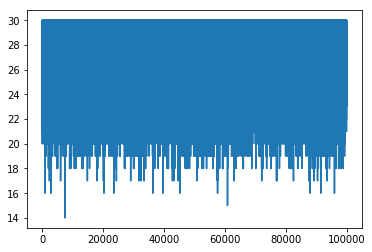

In [134]:
%pylab inline
plot(out_arry)

In [128]:
out_arry

[[True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 [True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  False,
  True,
  True,
  True,
  False,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 [True,
  True,
  True,
  T